In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score, roc_curve, auc

%matplotlib inline


In [2]:
#회귀분석
from statsmodels.formula.api import ols
import statsmodels.api as sm

#qqplot,회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

#선형모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf

#선형회귀모형
from sklearn.linear_model import LinearRegression

#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#평가함수
from statsmodels.tools.eval_measures import rmse

#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

#jupyter notebook 사용시 그래프 자동출력 옵션
%matplotlib inline

In [3]:
#export_graphviz:나무구조생성및 저장
from sklearn.tree import export_graphviz

#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz

#데이터 분할:train, test
from sklearn.model_selection import train_test_split

#예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeClassifier

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#모델 성능 평가
from sklearn.metrics import confusion_matrix


from statsmodels.api import Logit
from sklearn.metrics import accuracy_score


In [4]:
def fun_plot_hist(data,var):
    plt.hist(data[data['SCALE'] == '양품'][var], label = '양품', alpha = 0.5)
    plt.hist(data[data['SCALE'] == '불량'][var], label = '불량', alpha = 0.5)
    plt.legend()

In [5]:
# 교차표 def
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data['SCALE'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['SCALE'], columns = data[var], normalize = 'columns').round(3))

## 그래프는 가장 밑쪽에 있습니다.

In [6]:
df_raw = pd.read_csv("/home/piai/Desktop/3. big data분석/SCALE불량.csv", engine='python',encoding='euc-kr' )
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [7]:
good, bad = df_raw["SCALE"].value_counts()

print("공정의 불량률 %.3f " %(bad / len(df_raw["SCALE"])))

공정의 불량률 0.321 


In [8]:
#결측치 확인
df_raw.isnull().sum(axis = 0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [9]:
#목표변수, 설명변수 지정
df_raw_y1 = df_raw["SCALE"]
df_raw_x1 = df_raw.drop(["SCALE","SPEC","ROLLING_DATE"],axis = 1, inplace = False)
df_raw_x1

,PLATE_NO,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,C0,20.14,3580,38639,21870,3호기,1,1172,72,1164,62,245,1164,1005,적용,8,2조
716,PB563503,C0,15.08,3212,48233,18340,2호기,1,1150,61,1169,61,238,1169,947,적용,10,1조
717,PB563504,C0,16.60,3441,43688,19590,2호기,2,1169,65,1163,77,247,1163,948,적용,10,4조
718,PB563505,C0,15.59,3363,48740,80240,3호기,2,1179,86,1163,45,243,1163,940,적용,10,2조


목표변수 SCALE에 영향을 주지 않는 요인 제거

In [10]:
#get_dummies : 데이터의 문자형 변수에 대한 더미변수 생생

df_raw_y = np.where(df_raw_y1 == "양품", 0, 1 )
df_raw_x = df_raw.drop("SCALE" , axis = 1, inplace =False)

df_dummy = pd.get_dummies(df_raw_x.drop(["PLATE_NO", "ROLLING_DATE", "SPEC", "STEEL_KIND"], axis = 1, inplace = False))
# df_dumm


In [11]:
#연속형 : PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5
#이산형 : SCALE,SPEC,STEEL_KIND,FUR_NO,HSB,ROLLING_DESCALING,WORK_GR

In [12]:
for i in range(0, 720) :
    if df_dummy["ROLLING_TEMP_T5"][i] == 0 :
        df_dummy["ROLLING_TEMP_T5"][i] = 933 # df_raw["ROLLING_TEMP_T5"].agg("mean")

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_dummy, df_raw_y, test_size = 0.3 , random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("train data X size : {}".format(df_test_x.shape))
print("train data Y size : {}".format(df_test_y.shape))

train data X size : (504, 22)
train data Y size : (504,)
train data X size : (216, 22)
train data Y size : (216,)


In [14]:
# 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set :{:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set :1.000
Score on test set:0.968


In [15]:
df_importance  = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_uncustomized.feature_importances_

#ds_feature
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.head(10).round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.561
16,HSB_미적용,0.149
10,FUR_EXTEMP,0.117
12,ROLLING_DESCALING,0.062
0,PT_THK,0.025
9,FUR_TIME,0.022
8,FUR_SZ_TIME,0.017
6,FUR_HZ_TIME,0.012
5,FUR_HZ_TEMP,0.008
20,WORK_GR_3조,0.006


Text(0, 0.5, '설명변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

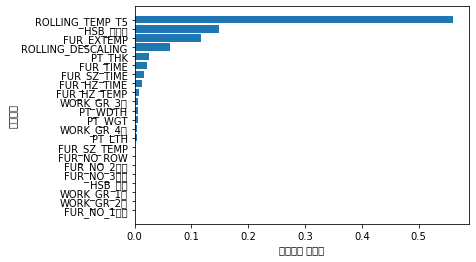

In [16]:
df_importance.sort_values("Importance", ascending=True, inplace= True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

1순위 - ROLLING_TEMP_T5        가장 중요한 요소  
2순위 - HSB 미적용              HSB 미적용시 100% 불량 발생으로 유의하지 않은 요소  
3순위 - FUR_EXTEMP             추출온도 중요  
4순위 - ROLLING_DESCALING      DESCALING 횟수에 따른 불량 발생   
5순위 - PT_THK                 두께에 따른 불량 발생 / 선택할 수 있는 요소는 아님  
6순위 - TIME                   가열 시간에 따른 불량 발생  
  
  
적정 온도 및 시간, 횟수가 중요함.

## ROLLING_TEMP_T5   
## FUR_EXTEMP  
## ROLLING_DESCALING    
## TIME  
## 네가지 요인에 대해 집중 분석

# 의사결정나무

In [50]:
df_raw = pd.read_csv("/home/piai/Desktop/3. big data분석/SCALE불량.csv", engine='python',encoding='euc-kr' )
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [19]:
#get_dummies : 데이터의 문자형 변수에 대한 더미변수 생생

df_raw_y = np.where(df_raw_y1 == "양품", 0, 1 )
df_raw_x = df_raw.drop("SCALE" , axis = 1, inplace =False)

df_dummy = pd.get_dummies(df_raw_x.drop(["PLATE_NO", "ROLLING_DATE", "SPEC", "STEEL_KIND","FUR_NO_ROW", "FUR_NO","WORK_GR","FUR_TIME"], axis = 1, inplace = False))


# df_dummy1 = pd.get_dummies(df_raw.drop(["PLATE_NO", "ROLLING_DATE", "SPEC", "STEEL_KIND","FUR_NO_ROW", "FUR_NO","WORK_GR","FUR_TIME"], axis = 1, inplace = False))
# df_dummy1
# df_dummy

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,HSB_미적용,HSB_적용
0,32.25,3707,15109,14180,1144,116,1133,59,1133,934,8,0,1
1,32.25,3707,15109,14180,1144,122,1135,53,1135,937,8,0,1
2,33.27,3619,19181,18130,1129,116,1121,55,1121,889,8,0,1
3,33.27,3619,19181,18130,1152,125,1127,68,1127,885,8,0,1
4,38.33,3098,13334,12430,1140,134,1128,48,1128,873,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20.14,3580,38639,21870,1172,72,1164,62,1164,1005,8,0,1
716,15.08,3212,48233,18340,1150,61,1169,61,1169,947,10,0,1
717,16.60,3441,43688,19590,1169,65,1163,77,1163,948,10,0,1
718,15.59,3363,48740,80240,1179,86,1163,45,1163,940,10,0,1


In [20]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_dummy, df_raw_y, test_size = 0.3 , random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("train data X size : {}".format(df_test_x.shape))
print("train data Y size : {}".format(df_test_y.shape))

train data X size : (504, 13)
train data Y size : (504,)
train data X size : (216, 13)
train data Y size : (216,)


In [21]:
# 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set :{:.3f}'.format(tree_uncustomized.score(df_train_x,\
                                                                   df_train_y)))
# Test 데이터 설명력
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x, \
                                                              df_test_y)))

Score on training set :1.000
Score on test set:0.981


## 깊이에 따른 나무모델

In [22]:
train_accuracy = [] ; test_accuracy = []

#max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth : 
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
#데이터 데이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.887,0.898
1,2,0.929,0.944
2,3,0.958,0.972
3,4,0.966,0.977
4,5,0.966,0.977
5,6,0.978,0.977
6,7,0.980,0.977
7,8,0.986,0.972
8,9,1.000,0.981
9,10,1.000,0.981


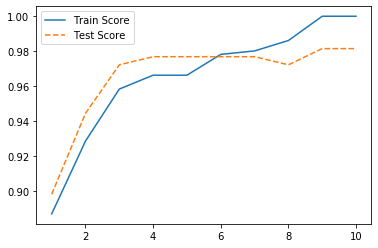

In [23]:
#모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

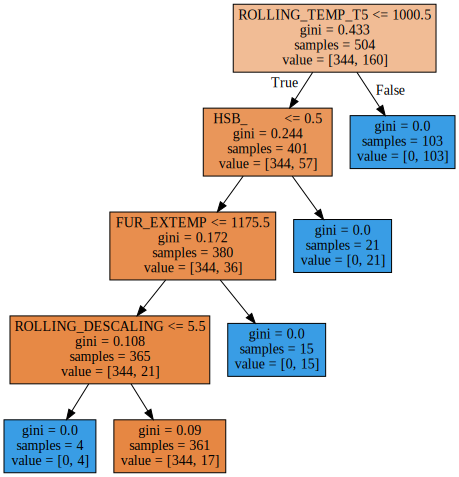

In [26]:
v_feature_name = df_train_x.columns

#잎사귀 노드의 최소 자료수 = 8 모델
tree_low = DecisionTreeClassifier(max_depth = 4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_low, out_file="tree_low.dot", feature_names= v_feature_name, impurity = True, filled=True)
with open("tree_low.dot") as f:
     dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최종 나무 모델 선택

In [27]:
tree_final = DecisionTreeClassifier(random_state=1234, min_samples_leaf=4, min_samples_split=8, max_depth=4)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

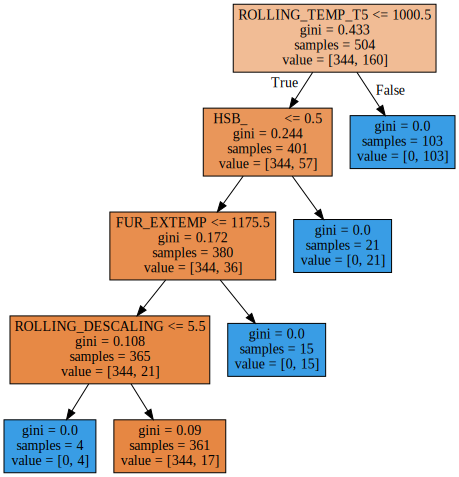

In [28]:
export_graphviz(tree_final, out_file= "tree_final.dot",
               feature_names=v_feature_name, impurity = True, filled= True)

with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [29]:
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on test set: 0.977


## 의사결정나무에 의한 중요도

In [30]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.648
11,HSB_미적용,0.175
8,FUR_EXTEMP,0.138
10,ROLLING_DESCALING,0.039
0,PT_THK,0.000
1,PT_WDTH,0.000
2,PT_LTH,0.000
3,PT_WGT,0.000
4,FUR_HZ_TEMP,0.000
5,FUR_HZ_TIME,0.000


## 랜덤포레스트

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV

In [33]:
rf_uncustomized = RFR(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

#Train 데이터 설명력
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.984
Score on test set:0.938


In [34]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [35]:
#train 및 test 설명력 결과 저장
train_score=[]; test_score = []

#n_estimators: 트리 수 변경:1~100, *참조: para_n_tree: [1, 2, 3, ..., 10]
para_n_tree = [n_tree *10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RFR(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"]=test_score

In [36]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.977,0.935
1,20,0.981,0.944
2,30,0.983,0.943
3,40,0.984,0.942
4,50,0.984,0.938
5,60,0.984,0.939
6,70,0.983,0.938
7,80,0.983,0.937
8,90,0.984,0.939
9,100,0.984,0.938


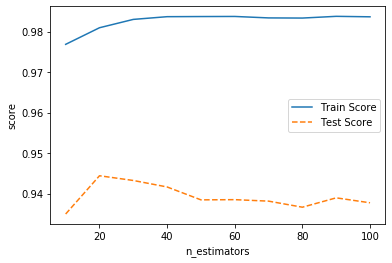

In [37]:
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

## 최종 랜덤포레스트 모델

In [45]:
rf_final=RFR(random_state=1234, n_estimators=20, min_samples_leaf=1, min_samples_split=4, max_depth=10)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.971
Score on test set: 0.944


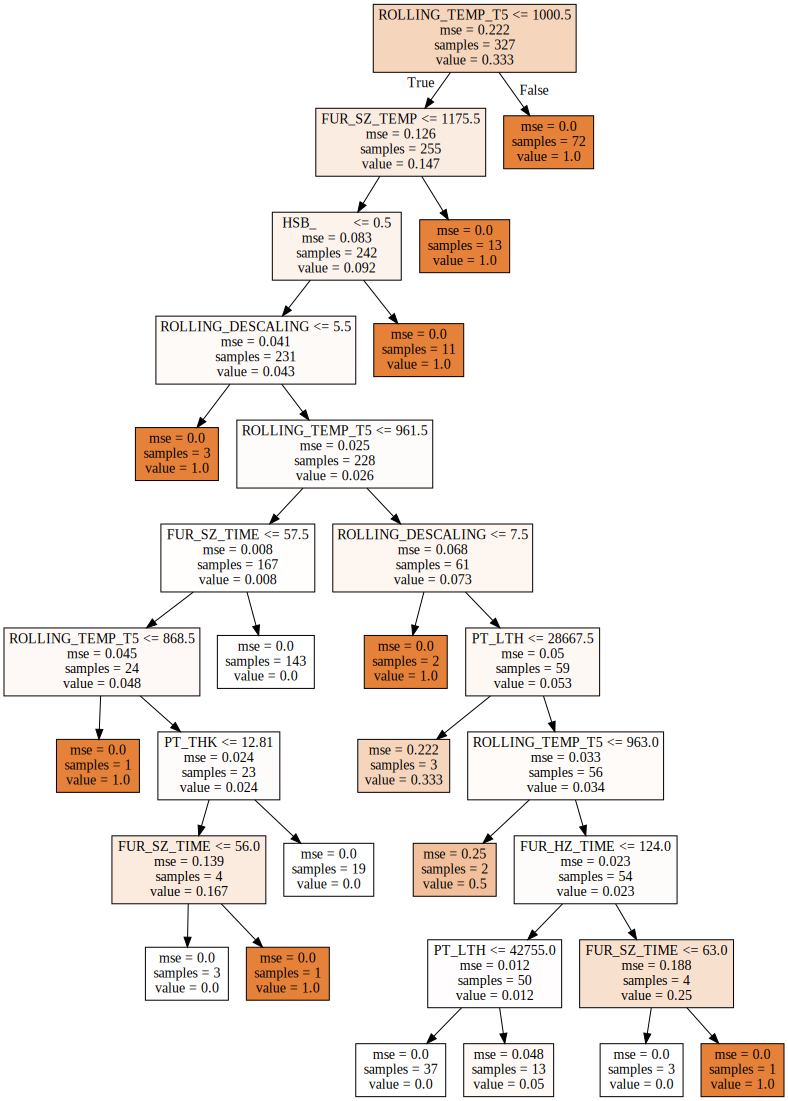

In [46]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name, \
               impurity=True, filled=True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [47]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.592
12,HSB_적용,0.088
6,FUR_SZ_TEMP,0.072
10,ROLLING_DESCALING,0.071
11,HSB_미적용,0.065
8,FUR_EXTEMP,0.046
7,FUR_SZ_TIME,0.018
3,PT_WGT,0.014
0,PT_THK,0.012
1,PT_WDTH,0.008


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

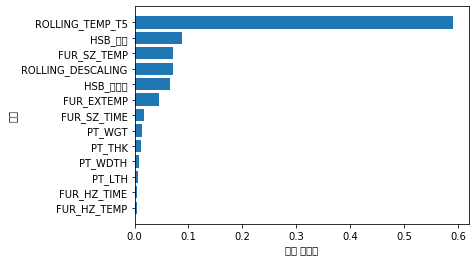

In [48]:
df_importance.sort_values("Importance",ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 그래디언트 부스팅

In [54]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier as GBR


from sklearn.model_selection import GridSearchCV

In [55]:
# 모델 생성
tree_uncustomized = GBR(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set :{:.3f}'.format(tree_uncustomized.score(df_train_x,\
                                                                    df_train_y)))

# Test 데이터 설명력
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x, \
                                                               df_test_y)))

Score on training set :1.000
Score on test set:1.000


## LEARNING RATE 설정

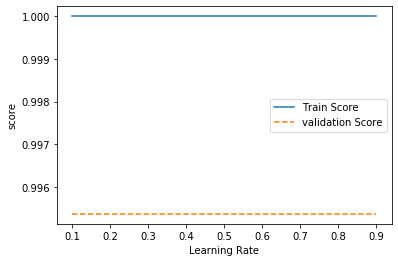

In [58]:
# learning_date: 학습률 변경에 따른 모델 성능

#train 및 test 설명력 결과 저장
train_score = []; test_score = []

#n_estimators: 트리 수 변경:1~100, *참조: para_n_tree: [1, 2, 3, ..., 10]
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GBR(random_state=1234, n_estimators=60, min_samples_leaf= 8,min_samples_split=20, max_depth=7, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["testScore"]=test_score

# 띄우기
plt.plot(para_lr, train_score, linestyle='-', label='Train Score')
plt.plot(para_lr, test_score, linestyle='--', label='validation Score')
plt.ylabel("score"); plt.xlabel("Learning Rate")
plt.legend()

## 최종 그래디언트부스팅 모델

In [59]:
# 결론 도출 - 최종모델 생성
gb_final = GBR(random_state=1234, n_estimators=60, min_samples_leaf= 8,min_samples_split=20, max_depth=7,learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

#Train, Test 데이터 설명력
#Train 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))


Score on test set: 0.995


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

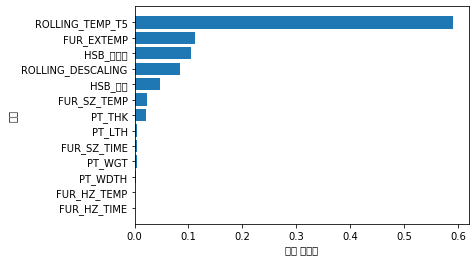

In [60]:
# 변수명 저장
v_feature_name =df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

기법 한가지만 더 사용하고 해석

## 인공신경망

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [67]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy on training set : {:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set : 0.552
Accuracy on test set : 0.616


In [68]:
nn_uncustomized

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [70]:
train_accuracy = []; test_accuracy = [];

para_hidden = [20* hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.522,0.505
1,40,0.738,0.708
2,60,0.730,0.731
3,80,0.720,0.722
4,100,0.552,0.616
5,120,0.688,0.662
6,140,0.708,0.694
7,160,0.704,0.718


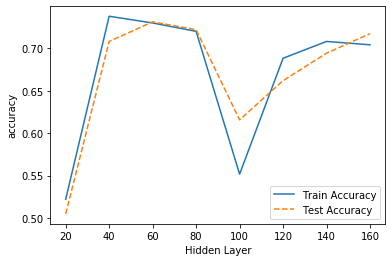

In [71]:
#그래프로 확인
plt.plot(para_hidden, train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_hidden, test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

In [74]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummy)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,HSB_미적용,HSB_적용
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.729972,-0.949149,-0.544097,-0.949149,0.000734,-0.19693,-0.219169,0.219169
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.889399,-0.835252,-0.708951,-0.835252,0.028567,-0.19693,-0.219169,0.219169
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.729972,-1.632537,-0.654000,-1.632537,-0.416748,-0.19693,-0.219169,0.219169
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,0.969113,-1.290843,-0.296815,-1.290843,-0.453858,-0.19693,-0.219169,0.219169
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.208255,-1.233894,-0.846330,-1.233894,-0.565186,-0.19693,-0.219169,0.219169


In [75]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_scaled_train_x.shape))
print("test data size : {}".format(df_scaled_test_x.shape))

train data size : (504, 13)
test data size : (216, 13)


In [76]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(nn_uncustomized.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(nn_uncustomized.score(df_scaled_test_x,df_test_y)))

Accuracy on training set : 0.728
Accuracy on test set : 0.722


/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 최종 인공지능 모델

In [77]:
# 최종모델
nn_final = MLPClassifier( hidden_layer_sizes=(80,80),activation = 'relu',solver='adam',
                         batch_size = 100, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(nn_final.score(df_scaled_train_x,df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(nn_final.score(df_scaled_test_x,df_test_y)))
# Confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.976
Accuracy on test set:0.912
Confusion matrix:
[[135  10]
 [  9  62]]


/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 탐색적 기법

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

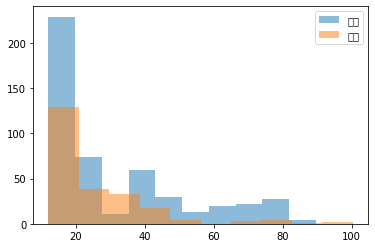

In [33]:
fun_plot_hist(df_raw, 'PT_THK')

두께가 얇으면 불량이 급증한다.

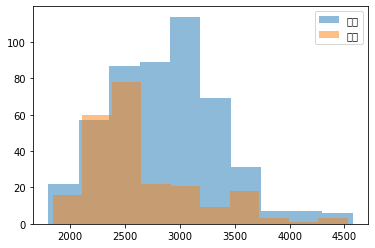

In [34]:
fun_plot_hist(df_raw, 'PT_WDTH')

넓이  
2700이하에서 불량이 급증한다.

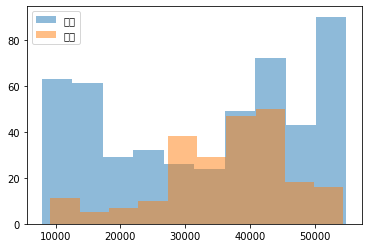

In [35]:
fun_plot_hist(df_raw, 'PT_LTH')

길이  
25000~45000에서 불량이 급증한다

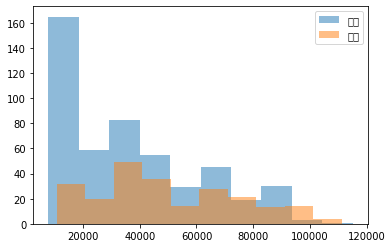

In [36]:
fun_plot_hist(df_raw, 'PT_WGT')

중량  
10000이하인 경우 불량이 발생하지 않는다. 그 외에는 유의하지 않아 보인다.

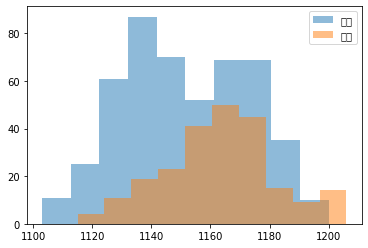

In [37]:
fun_plot_hist(df_raw, 'FUR_HZ_TEMP')

가열로 가열대 온도  
1120도 이상에서 불량이 급증한다. 1200도 이상일 시 무조건 불량

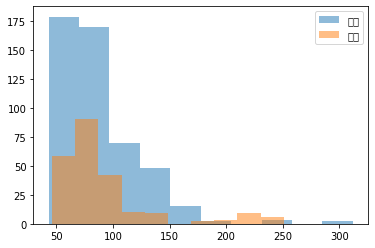

In [38]:
fun_plot_hist(df_raw, 'FUR_HZ_TIME')

가열로 가열대 시간  
150~170 부근에서는 불량이 발생하지 않음 / 이상치 발견

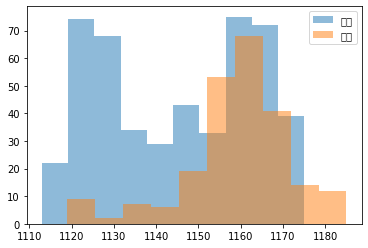

In [39]:
fun_plot_hist(df_raw, 'FUR_SZ_TEMP')

가열로 가열대 온도  
1110도 이하에서는 불량 발생하지 않는다. 1145도부터 불량이 급증한다.  
1175도 이상에는 모두 불량 발생

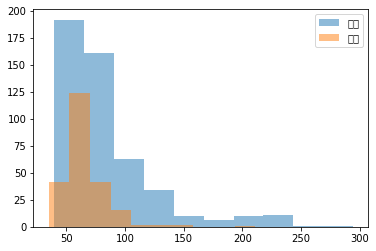

In [40]:
fun_plot_hist(df_raw, 'FUR_SZ_TIME')

가열로 가열대 시간  
시간이 110 이하에서 불량이 급증한다.

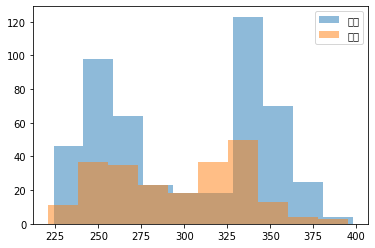

In [41]:
fun_plot_hist(df_raw, 'FUR_TIME')

기존 발생하던 불량률 32%와 비슷한 것으로 보여 유의하지 않다.

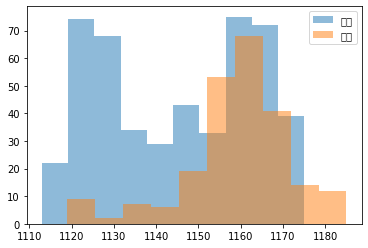

In [42]:
fun_plot_hist(df_raw, 'FUR_EXTEMP')

추출온도  
추출온도가 1110도 이하라면 불량이 발생하지 않는다.  
1145도 이상이면 불량이 급증한다.

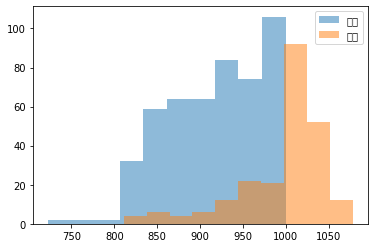

In [43]:
fun_plot_hist(df_raw, 'ROLLING_TEMP_T5')

압연온도  
1000도 이상에서 압연시 불량이 반드시 발생한다.

## 범주형 변수

In [44]:
# 가열로 호기
fun_print_crosstab(df_raw, 'FUR_NO')

FUR_NO  1호기  2호기  3호기
SCALE                
불량       73   70   88
양품      167  167  155

FUR_NO    1호기    2호기    3호기
SCALE                      
불량      0.304  0.295  0.362
양품      0.696  0.705  0.638


1호기, 2호기, 3호기는 불량에 영향을 주지 않는다.

In [45]:
fun_print_crosstab(df_raw, 'STEEL_KIND')

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
불량          212   1   1   2   2   0   2   6   5
양품          291   0   6  14  16   2  41  29  90

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
불량          0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053
양품          0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947


c0에서 불량률이 42%이다. c0 steel에 문제가 있을 가능성이 있음.

In [46]:
fun_print_crosstab(df_raw, 'HSB')

HSB    미적용   적용
SCALE          
불량      33  198
양품       0  489

HSB    미적용     적용
SCALE            
불량     1.0  0.288
양품     0.0  0.712


HSB 미적용시 모두 불량이 발생한다. / 어떤 경우에 미적용되었는지 확인해볼 것

HSB미적용을 하면 불량이 100%, 양품들만 골라서 돌려보면 어떨까.

In [47]:
fun_print_crosstab(df_raw, 'ROLLING_DESCALING')

ROLLING_DESCALING  5    6   7    8   9    10
SCALE                                       
불량                  5   26  15   99  20   66
양품                  0  150   0  109   0  230

ROLLING_DESCALING   5      6    7      8    9      10
SCALE                                                
불량                 1.0  0.148  1.0  0.476  1.0  0.223
양품                 0.0  0.852  0.0  0.524  0.0  0.777


롤링을 6번한 경우와 10번 한경우를 제외하고 불량이 평균 불량률보다 높다.

In [48]:
fun_print_crosstab(df_raw, 'WORK_GR')

WORK_GR   1조   2조   3조   4조
SCALE                      
불량        67   45   54   65
양품       122  120  118  129

WORK_GR     1조     2조     3조     4조
SCALE                              
불량       0.354  0.273  0.314  0.335
양품       0.646  0.727  0.686  0.665


불량 발생 비율이 대체로 비슷하다. 유의하지 않은 변수로 볼 수 있다.

In [49]:
#DTC